In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [3]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<AxesSubplot:>

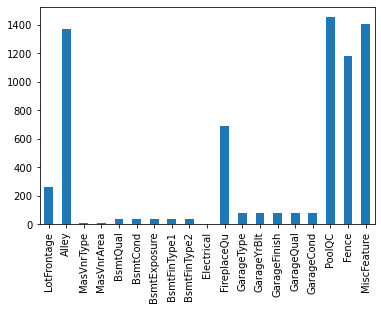

In [6]:
#lets plot all null values calumns 
df.isna().sum()[df.isna().sum()>0].plot(kind='bar')
#I will drop all columns with max null values 

In [7]:
df.drop(['Id','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [8]:
numeric_cols = df.select_dtypes(include=np.number)
categorical_cols = df.select_dtypes(include=['object'])

In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [10]:
imputer.fit(numeric_cols)

SimpleImputer(strategy='median')

In [11]:
X = imputer.transform(numeric_cols)
numeric_cols = pd.DataFrame(X, columns=numeric_cols.columns)

In [12]:
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(categorical_cols)

SimpleImputer(strategy='most_frequent')

In [13]:
X = imputer.transform(categorical_cols)
categorical_cols = pd.DataFrame(X, columns=categorical_cols.columns)

In [14]:
categorical_col = pd.get_dummies(categorical_cols)

In [15]:
df1 = pd.concat([numeric_cols,categorical_col],axis=1)

In [16]:
df1 = df1.drop_duplicates()

In [17]:
X = df1.drop(['SalePrice'],axis=1)
y = df1['SalePrice']

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [19]:
X = sc.fit_transform(X)

In [20]:
from sklearn.decomposition import PCA
pca = PCA(random_state =11,n_components=10)

In [21]:
pca.fit(X)

PCA(n_components=10, random_state=11)

In [22]:
x = pca.fit_transform(X)

In [23]:
new_df = pd.DataFrame(x)

In [24]:
new_df

0         1         2         3         4         5         6  \
0     4.335002  1.641446 -2.137836 -1.998571  0.635613 -1.213364  0.885016   
1    -0.160461 -3.146650 -0.634376  0.068775  0.080133 -0.598641 -1.305841   
2     4.885657  1.114739 -1.481892 -1.950356  1.016634 -1.904693  0.515293   
3    -2.016678  1.157299  1.769418 -1.865077 -0.348299 -0.949344 -2.079638   
4     6.521545  0.821301  0.510043 -3.434229  0.573741 -0.854893  1.101771   
...        ...       ...       ...       ...       ...       ...       ...   
1455  1.930254  2.218394 -1.824052 -2.534028 -0.238186 -1.724909  1.320855   
1456  0.019543 -5.392973  1.086903 -0.393150 -0.651464  1.254091  1.046288   
1457  0.906248  1.773197  2.366102 -2.252502  0.013563  2.329282 -3.499988   
1458 -3.194497 -3.617021 -0.775591  1.993814 -0.828151 -0.709743 -2.087499   
1459 -1.306807 -3.955993 -1.292327 -0.492298 -0.680515 -0.152664 -0.252952   

             7         8         9  
0     0.893318 -1.421062 -0.840561  
1     0.049467 -0.732513  0.285297  
2     0.994846 -1.487817 -0.116940  
3    -0.093457  1.029666  0.993027  
4     1.543911 -2.154821  0.286868  
...        ...       ...       ...  
1455 -1.095664  0.619390  0.008013  
1456  1.502834  2.153281 -2.354497  
1457  0.977436  0.288492 -1.260698  
1458  0.534077  0.465815 -1.342411  
1459  1.252513 -0.604873 -0.135803  

[1460 rows x 10 columns]

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(new_df,y,train_size=0.2,random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [27]:
lr.fit(X_train,y_train)

LinearRegression()

In [28]:
y_pred = lr.predict(X_test)

In [29]:
from sklearn.metrics import r2_score

In [30]:
r2_score(y_test,y_pred)

0.7802622604850978

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
mean_squared_error(y_pred,y_test)

1445136149.4714785

In [33]:
error = pd.DataFrame({'actal':y_test,'predict':y_pred})

In [34]:
error

actal        predict
892   154500.0  131740.926171
1105  325000.0  304070.899288
413   115000.0   99342.869663
522   159000.0  168958.416186
1036  315500.0  327588.420064
...        ...            ...
1069  135000.0  100290.512991
476   208900.0  233311.109880
157   269500.0  286779.610929
16    149000.0  155955.906548
1072   91500.0  112032.858593

[1168 rows x 2 columns]

visualizer = PCA(scale=True, proj_features=True)
visualizer.fit_transform(X_train, y_train)
visualizer.show()

In [35]:
Df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

<AxesSubplot:>

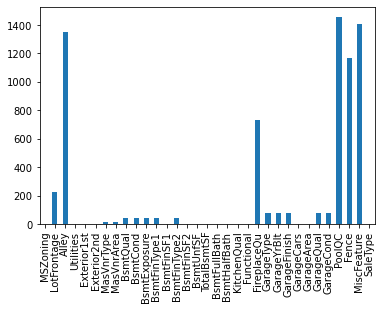

In [36]:
Df.isna().sum()[Df.isna().sum()>0].plot(kind='bar')

In [37]:
Df.drop(['Id','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [38]:
Numeric_cols = df.select_dtypes(include=np.number)
Categorical_cols = df.select_dtypes(include=['object'])

In [39]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [40]:
imputer.fit(Numeric_cols)

SimpleImputer(strategy='median')

In [41]:
X = imputer.transform(Numeric_cols)
Numeric_cols = pd.DataFrame(X, columns=Numeric_cols.columns)

In [42]:
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(Categorical_cols)

SimpleImputer(strategy='most_frequent')

In [43]:
X = imputer.transform(Categorical_cols)
Categorical_cols = pd.DataFrame(X, columns=Categorical_cols.columns)

In [44]:
Categorical_col = pd.get_dummies(categorical_cols)

In [45]:
test_df = pd.concat([numeric_cols,categorical_col],axis=1)

In [46]:
test_df = df1.drop_duplicates()

In [47]:
test_df = sc.fit_transform(test_df)

In [48]:
test_df = pca.fit_transform(test_df)

In [49]:
test = pd.DataFrame(test_df)

In [50]:
test.shape

(1460, 10)

In [51]:
test_pred = lr.predict(test)

In [52]:
sub = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [53]:
output = pd.DataFrame({'ID':sub.Id, 'SalePrice':test_pred[:1459]})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
